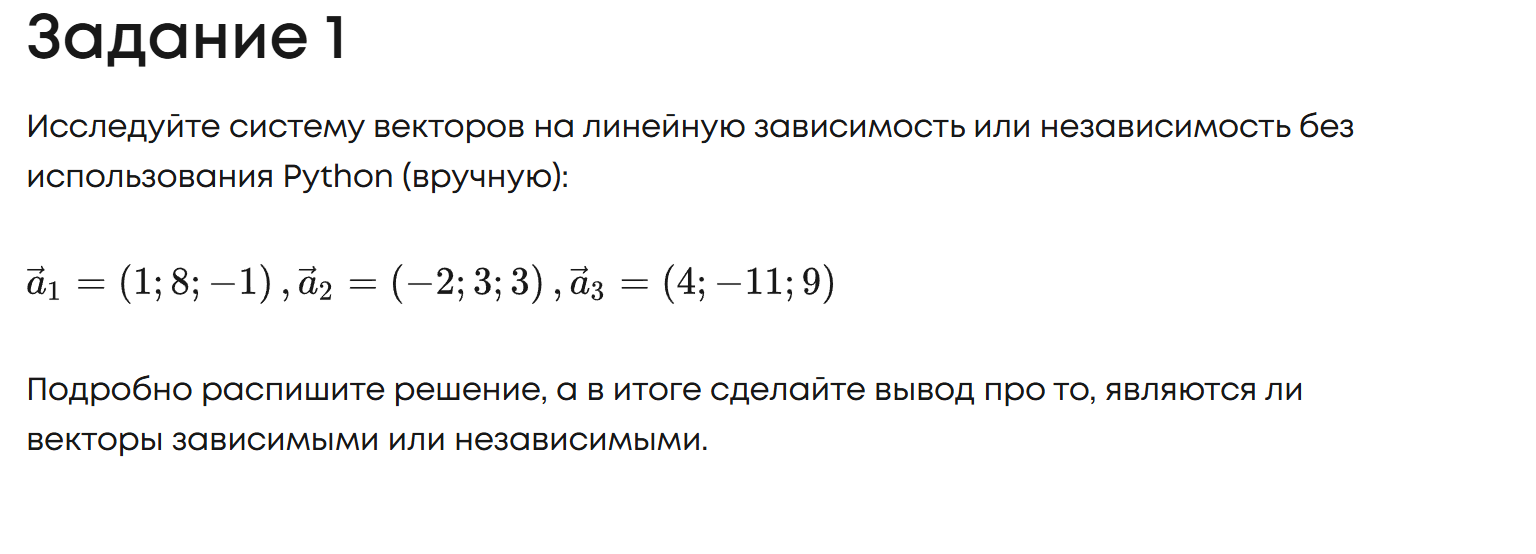

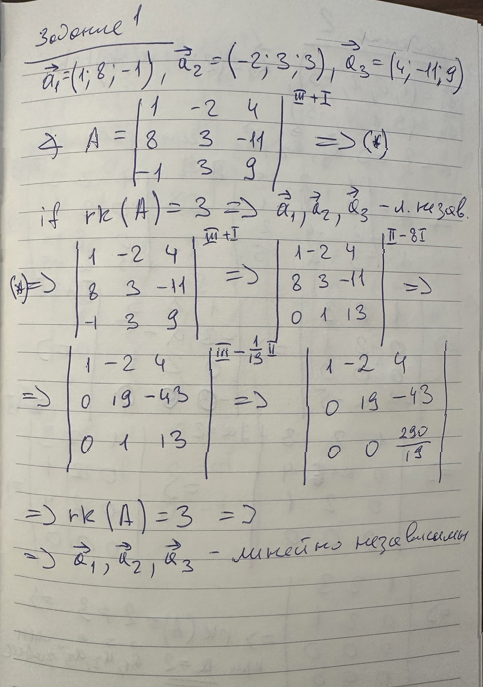

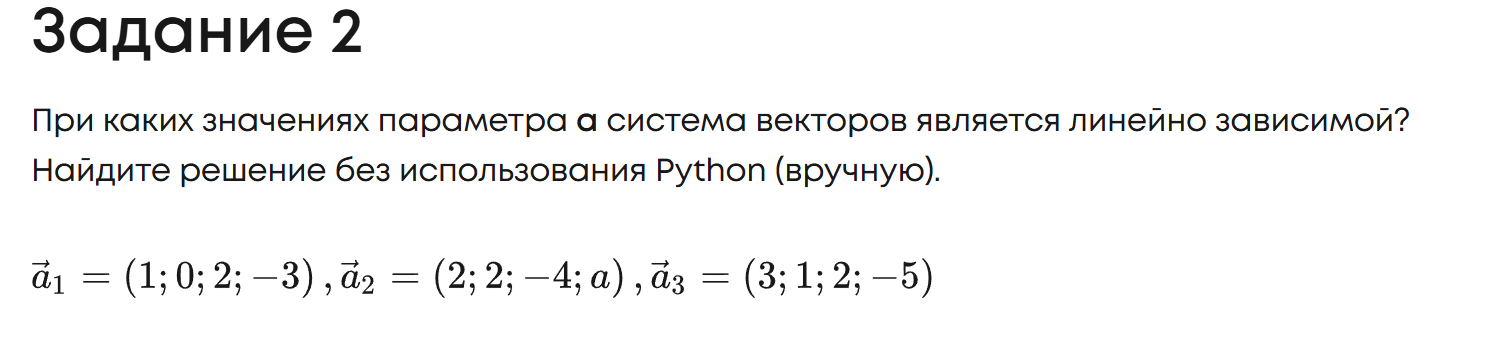

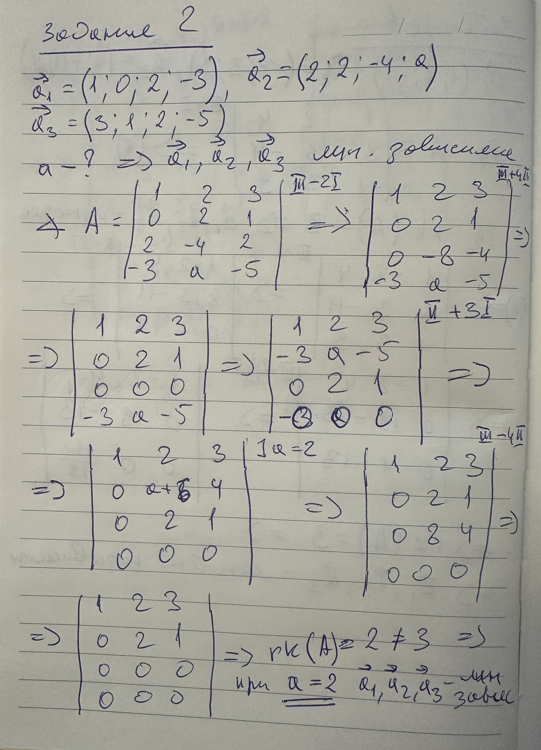

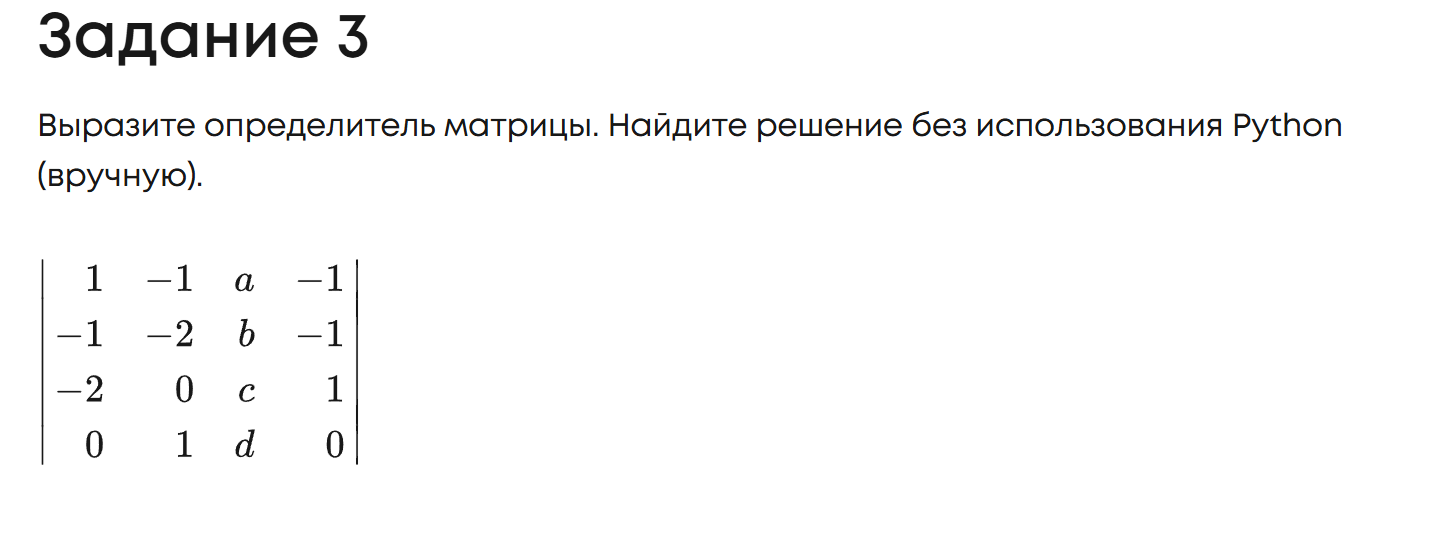

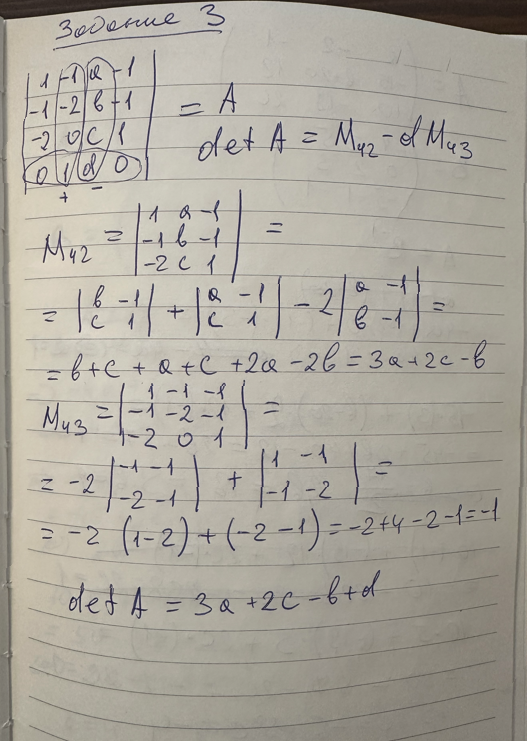

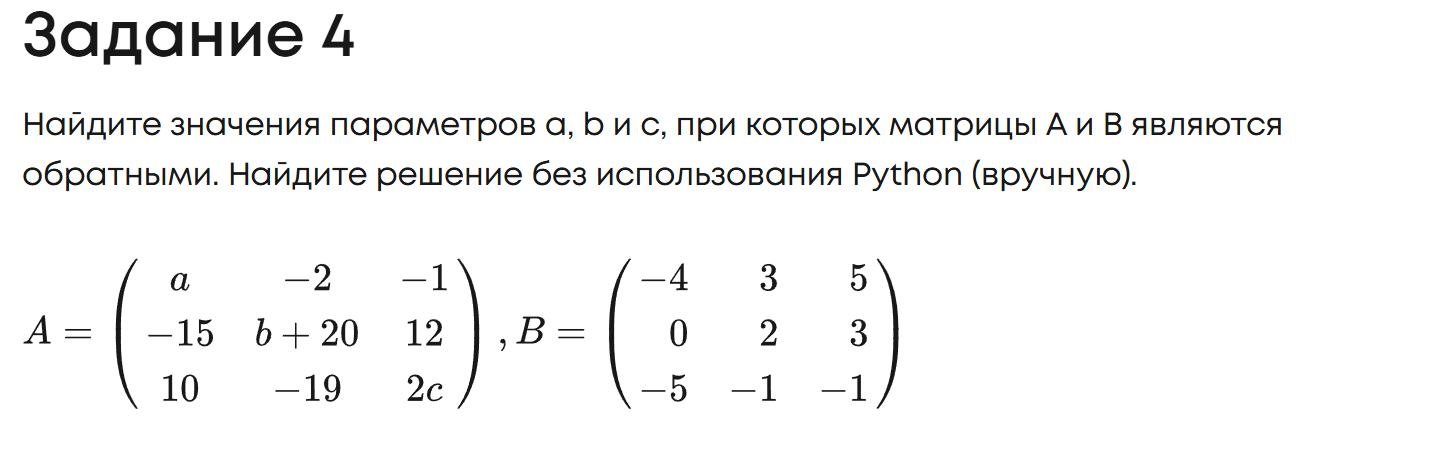

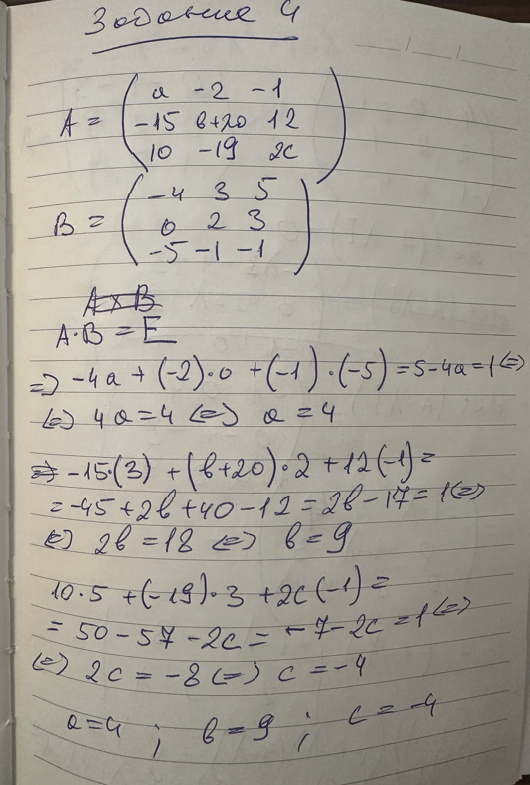

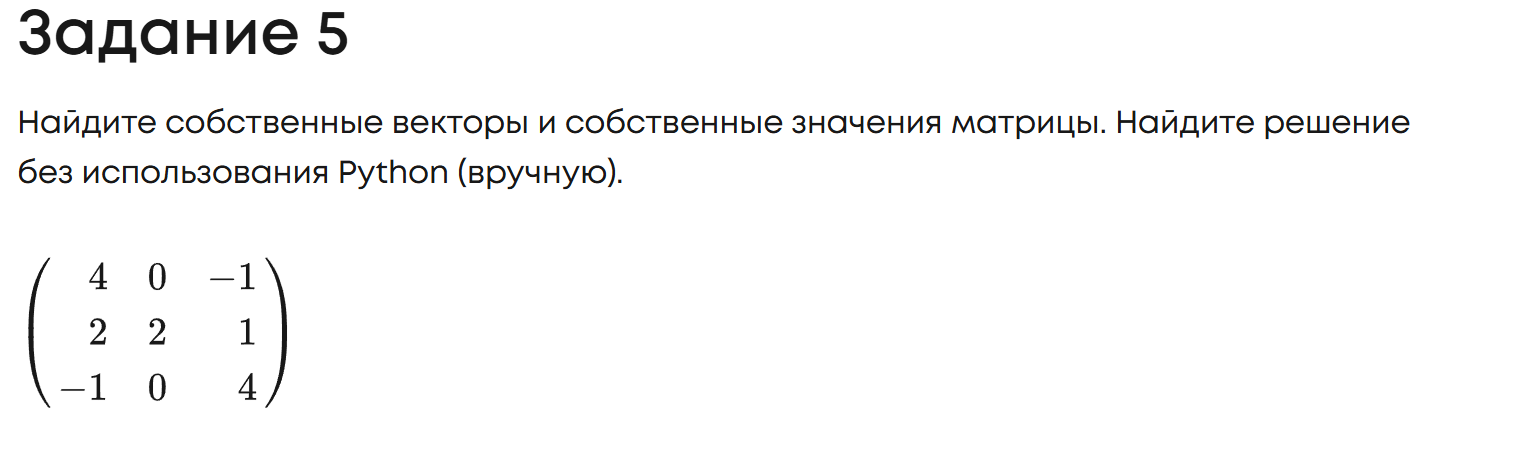

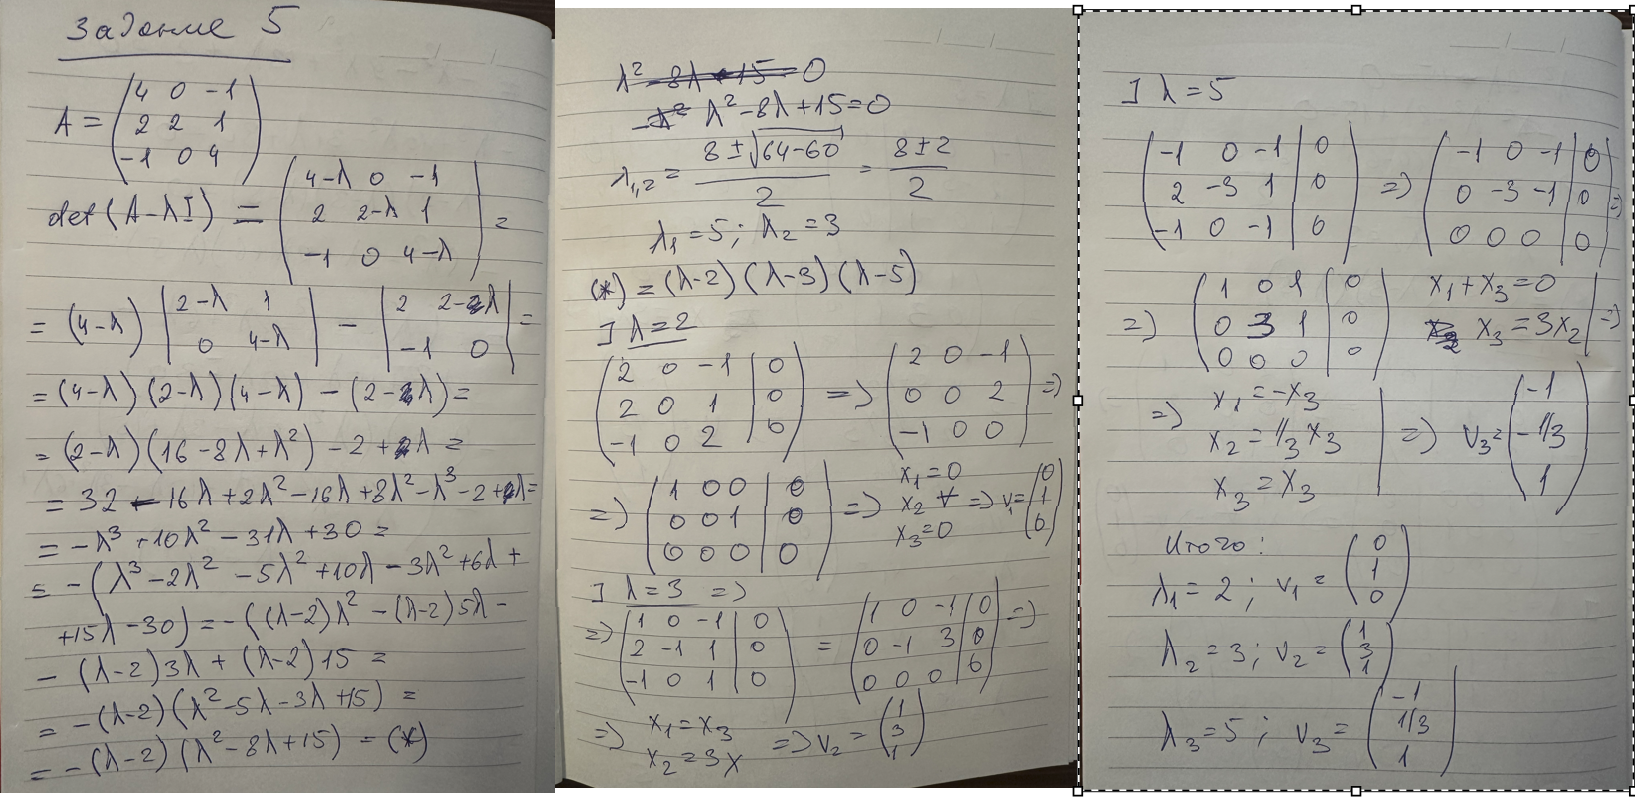

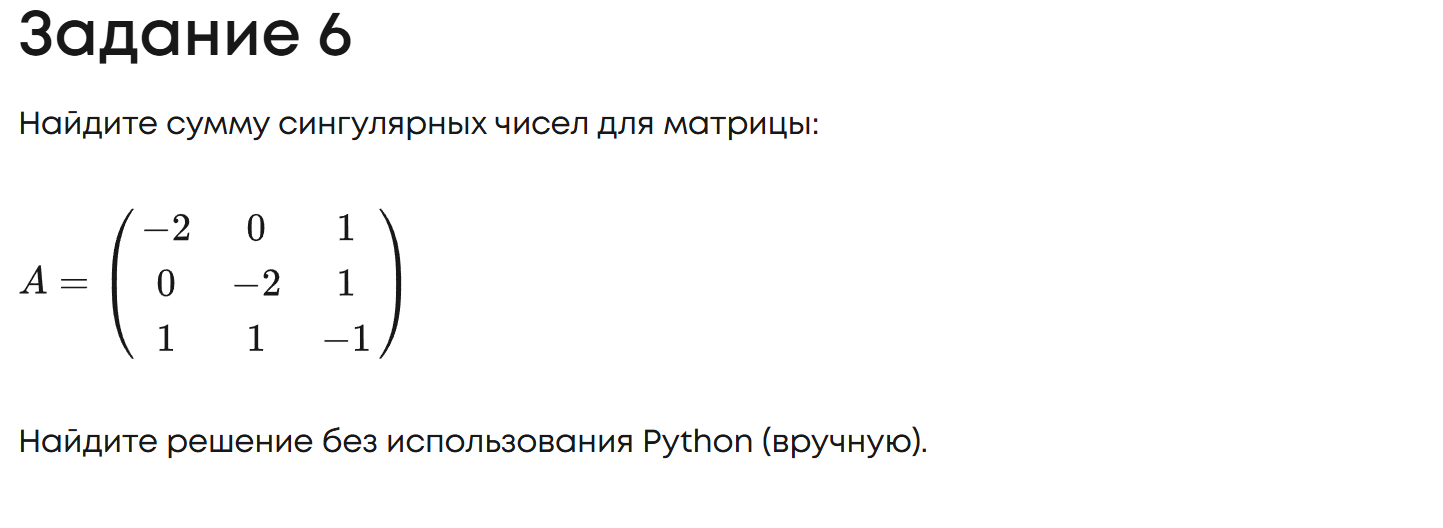

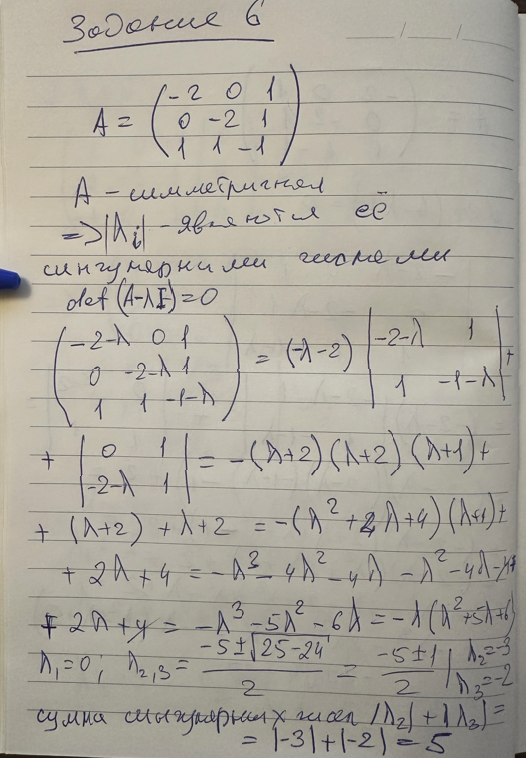

### Задание 7
Загрузите данные. Изучите, есть ли в них пропущенные значения?Распишите решение с помощью кода на языке Python и напишите текстом интерпретацию полученного вывода.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загружаем данные
df = pd.read_csv('bikes.csv')
# Проверим наличие пропущенных значений
missing = df.isnull().sum()
# Выведем количество пропущенных значений по каждому столбцу
print(missing)

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64


В данном случае все значения равны нулю, что означает, что в таблице нет пропущенных значений. То есть для каждого столбца все строки имеют заполненные данные.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


### Задание 8
Исследуем данные на наличие линейной зависимости между столбцами. Найдите ранг матрицы данных. Сравните его с количеством столбцов, сделайте вывод. Если линейная зависимость есть - напишите, между какими столбцами и удалите один из них.

In [18]:
# Вычисляем ранг матрицы
rank = np.linalg.matrix_rank(df)

# Выводим ранг матрицы
print(f"Ранг матрицы: {rank}")

# Сравниваем с количеством столбцов
num_columns = df.shape[1]
print(f"Количество столбцов: {num_columns}")


Ранг матрицы: 12
Количество столбцов: 13


ранг матрицы меньше количества столбцов, это означает наличие линейной зависимости между некоторыми столбцами.

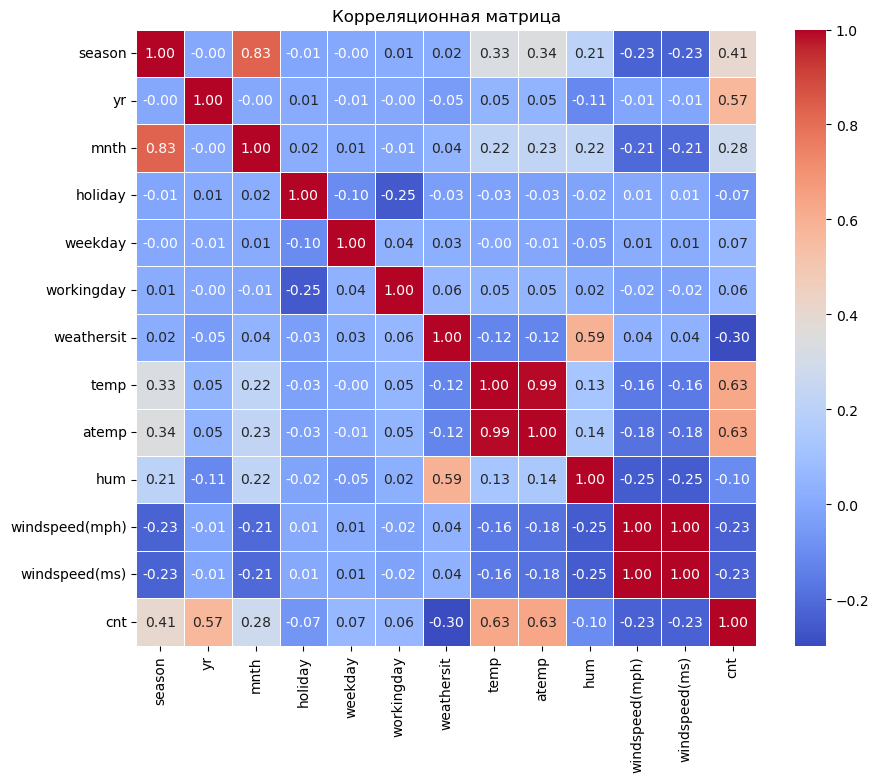


Сильно коррелирующие пары переменных (корреляция выше 0.9): [('temp', 'atemp'), ('atemp', 'temp'), ('windspeed(mph)', 'windspeed(ms)'), ('windspeed(ms)', 'windspeed(mph)')]


In [20]:
# Вычисляем корреляционную матрицу
corr_matrix = df.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()
# Проверка на мультиколлинеарность
corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix[col1][col2]) > 0.9]
print("\nСильно коррелирующие пары переменных (корреляция выше 0.9):", corr_pairs)

Обнаружена линейная зависимость, между windspeed(mph) и windspeed(ms), удаляем windspeed(mph)

In [22]:
# удаляем windspeed(mph)
df = df.drop(columns=['windspeed(mph)'])

### Задание 9
Выведите корреляционную матрицу оставшихся переменных.

Какая переменная сильнее всего коррелирует с целевой?
Есть ли мультиколлинеарность? Между какими переменными? Если есть корреляция выше 0.9 - оставьте только 1 признак. Объясните выбор
Распишите решение с помощью кода на языке Python и напишите текстом интерпретацию полученного вывода.

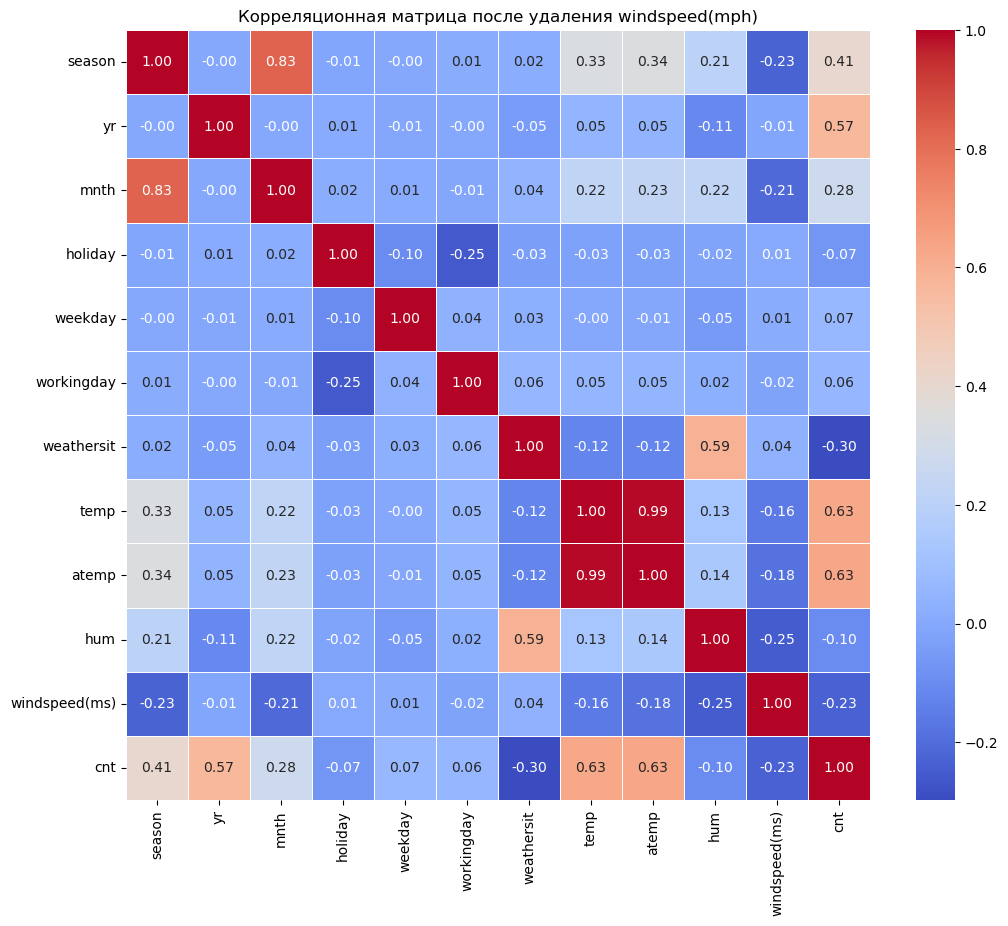

Корреляция с целевой переменной (cnt):
 cnt              1.000000
atemp            0.631066
temp             0.627494
yr               0.566710
season           0.406100
mnth             0.279977
weekday          0.067443
workingday       0.061156
holiday         -0.068348
hum             -0.100659
windspeed(ms)   -0.234545
weathersit      -0.297391
Name: cnt, dtype: float64

Сильно коррелирующие пары переменных (корреляция выше 0.9): [('temp', 'atemp'), ('atemp', 'temp')]


In [24]:
# Вычисляем корреляцию для оставшихся переменных
corr_matrix = df.corr()
# Строим тепловую карту для корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица после удаления windspeed(mph)')
plt.show()

# Определяем переменную, которая сильнее всего коррелирует с целевой переменной (cnt)
target_corr = corr_matrix['cnt'].sort_values(ascending=False)
print("Корреляция с целевой переменной (cnt):\n", target_corr)

# Проверка на мультиколлинеарность
# Если корреляция между переменными выше 0.9, удаляем одну из них
corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix[col1][col2]) > 0.9]
print("\nСильно коррелирующие пары переменных (корреляция выше 0.9):", corr_pairs)


In [25]:
# удаляем temp
df = df.drop(columns=['temp'])

Переменные temp и atemp имеют корреляцию 0.99, это указывает на то, что они фактически представляют одно и то же, и можно оставить только одну из них, например, atemp, т.к. люди скорее всего принимают решение об аренде на основании своих температурных ощущений. Сильнее всего с целевой переменной cnt коррелирует atemp.

### Задание 10
Разделите данные на предикторы и целевую переменную. Обучите модель с помощью классической линейной регрессии. Линейную регрессию необходимо реализовать без готовых библиотек.

Оцените качество модели с помощью хотя бы двух метрик качества.

In [28]:
# Разделим данные на предикторы (X) и целевую переменную (y)
X = df.drop(columns=['cnt'])  # Все столбцы, кроме 'cnt'
y = df['cnt']  # Целевая переменная 'cnt'

# Добавляем столбец единичных значений для свободного члена
X = np.c_[np.ones(X.shape[0]), X]  # X с добавлением 1 для свободного члена
# Разделим данные на обучающую и тестовую выборки 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Реализация линейной регрессии с помощью метода наименьших квадратов
# Транспонируем матрицу признаков X_train (получаем X^T)
X_tr = X_train.T
# Умножаем транспонированную матрицу X^T на исходную матрицу X
X_tr_dot_X = np.dot(X_tr, X_train)
# Вычисляем обратную матрицу для X^T * X
X_tr_dot_X_inv = np.linalg.inv(X_tr_dot_X)
# Умножаем обратную матрицу на X^T
X_tr_dot_X_inv_dot_X_tr = np.dot(X_tr_dot_X_inv, X_tr)
# Умножаем на целевой вектор y для получения коэффициентов
beta = np.dot(X_tr_dot_X_inv_dot_X_tr, y_train)
# Получаем предсказания на тестовой выборке
y_pred = np.dot(X_test, beta)

# Оценка качества модели
# Среднеквадратичная ошибка (MSE)
mse = np.mean((y_test - y_pred) ** 2)
# Коэффициент детерминации R^2
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

# Выводим результаты
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")


Среднеквадратичная ошибка (MSE): 691646.4840861824
Коэффициент детерминации (R^2): 0.8275145168087926


##### Среднеквадратичная ошибка (MSE):
Значение 691646.48 указывает на среднюю квадратичную ошибку между предсказанными и реальными значениями количества арендованных велосипедов. Это число показывает, насколько сильно предсказания модели отклоняются от реальных данных. В данном случае, значение MSE довольно высокое, что может свидетельствовать о том, что модель имеет значительные ошибки при предсказаниях.

##### Коэффициент детерминации (R²):
Значение 0.83 (или 83%) говорит о том, что модель объясняет 83% вариации в данных, то есть 83% изменений в количестве арендованных велосипедов можно объяснить с помощью выбранных признаков. Модель имеет довольно высокую точность предсказаний, хотя есть еще некоторое пространство для улучшений.